In [ ]:
!pip install text2graphapi

In [ ]:
import pandas as pd
data = pd.read_csv("en_subtask1.csv")
data.head()

#recortamos la data para las pruebas
data_recortada = data.head(60)
dataprueba = 'dataprueba.csv'
data_recortada.to_csv(dataprueba, index=False)

data_human = data_recortada.loc[data_recortada['label'] == 'human']
data_generated = data_recortada.loc[data_recortada['label'] == 'generated']

data_human['filas'] = range(1, len(data_human) + 1)
data_generated['filas'] = range(1,len(data_generated)+1)

In [ ]:
tex_to_graph_human = []
for index, row in data_human.iterrows():
    fila = {"id": row['filas'], "doc": row['text']}
    tex_to_graph_human.append(fila)

In [ ]:
tex_to_graph_generated = []

for index, row in data_generated.iterrows():
    fila = {"id": row['filas'], "doc": row['text']}
    tex_to_graph_generated.append(fila)


In [ ]:
from text2graphapi.src.Cooccurrence import Cooccurrence

to_word_coocc_graph = Cooccurrence(graph_type = 'DiGraph',
        language = 'en', apply_prep = True,
        window_size = 3, output_format = 'networkx')


INFO:text2graphapi.src.Preprocessing:Has already installed spacy model en_core_web_sm


In [ ]:
Grafos_cooncurencia_human = to_word_coocc_graph.transform(tex_to_graph_human)
Grafos_cooncurencia_generated = to_word_coocc_graph.transform(tex_to_graph_generated)

INFO:text2graphapi.src.Cooccurrence:Init transformations: Text to Co-Ocurrence Graph
INFO:text2graphapi.src.Cooccurrence:Transforming 29 text documents...
INFO:text2graphapi.src.Cooccurrence:Done transformations
INFO:text2graphapi.src.Cooccurrence:Init transformations: Text to Co-Ocurrence Graph
INFO:text2graphapi.src.Cooccurrence:Transforming 31 text documents...
INFO:text2graphapi.src.Cooccurrence:Done transformations


In [ ]:
lista_grafos_humanos = []

for i in Grafos_cooncurencia_human:
  grafo = i['graph']
  lista_grafos_humanos.append(grafo)

lista_grafos_humanos

In [ ]:
lista_grafos_generated = []
for i in Grafos_cooncurencia_generated:
  grafo = i['graph']
  lista_grafos_generated.append(grafo)

lista_grafos_generated

In [96]:
#eficiencia global de conectividad en humanos
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import approximation as approx



lista1 = []
for grafo in lista_grafos_humanos:
  grafo = grafo.to_undirected()
  lista1.append(nx.global_efficiency(grafo))

  print(nx.global_efficiency(grafo))

print("La eficiencia global en promedio es:", sum(lista1)/len(lista1))



0.9
0.5950793650793659
0.5452107279693452
0.5787581699346405
0.5186134852801508
0.7444444444444442
0.6007905138339921
0.9
0.6284271284271282
0.7444444444444442
0.519846743295017
0.95
0.9
0.6509661835748791
0.8571428571428571
0.5942028985507236
0.5312186379928291
0.5263532763532753
0.5734519104084324
0.6856060606060602
0.5702898550724633
0.7212121212121209
0.576745718050065
0.7444444444444442
0.5524999999999989
0.586580086580087
0.4561770451770457
0.7777777777777779
0.95
La eficiencia global en promedio es: 0.6717339274362617


In [ ]:
#eficiencia global de conectividad en IA's
lista2 = []
for grafo in lista_grafos_generated:
  grafo = grafo.to_undirected()
  lista2.append(nx.global_efficiency(grafo))

  print(nx.global_efficiency(grafo))

print("La eficiencia global en promedio es:", sum(lista2)/len(lista2))



0.9
0.5119726678550216
0.95
0.7857142857142857
0.47767857142857134
0.7777777777777779
0.3560945352443325
0.9
0.6403508771929833
0.5974358974358963
0.6917211328976038
0.6647173489278755
0.9
0.9
0.5319624819624822
0.95
0.5099233716475079
0.5030864197530848
0.4089858655648105
0.7136363636363634
0.3496984005289662
0.6067193675889315
0.8154761904761905
0.8
0.5329861111111105
0.8154761904761905
0.4576878306878308
0.49236453201970265
0.8809523809523809
0.7666666666666667
0.5598039215686271
La eficiencia global en promedio es: 0.6693190061004901


In [ ]:
IAefg = sum(lista2)/len(lista2)
Hefg = sum(lista1)/len(lista1)
diferencia = abs(IAefg - Hefg)
print("la diferencia de eficiencias globales es:",diferencia)

la diferencia de eficiencias globales es: 0.0007695903157948214


In [ ]:
#promedio de cuantos nodos están conectados con otros nodos en humanos
lista3 = []
for grafo in lista_grafos_humanos:
  lista3.append(nx.average_neighbor_degree(grafo))

print(lista3)

# extraer los valores de los diccionarios
valores_numericosH = [valor for diccionario in lista3 for valor in diccionario.values() if isinstance(valor, (int, float))]

print(valores_numericosH)

average_neighbor_degree_promedio = sum(valores_numericosH)/len(valores_numericosH)
print("El promedio de cuantos nodos están conectados con otros nodos en humanos es:", average_neighbor_degree_promedio)

[{'pass': 2.6666666666666665, 'exam': 2.0, 'thankgod': 1.0, 'shsmy': 0.5, 'result': 0.0, 'ah': 0.0}, {'template': 5.666666666666667, 'parts': 8.333333333333334, 'mustache': 6.4, 'shape': 5.111111111111111, 'bow': 4.818181818181818, 'tie': 6.0, 'skinny': 5.666666666666667, 'rectangle': 5.666666666666667, 'eventually': 6.0, 'make': 5.75, 'loops': 8.333333333333334, 'tails': 6.666666666666667, 'glue': 4.333333333333333, 'scrapbooking': 4.0, 'project': 4.0, 'secure': 4.0, 'dots': 2.6666666666666665, 'doublesided': 2.0, 'tape': 2.0, 'foam': 2.0, 'mounting': 3.0}, {'products': 3.5, 'disassemble': 4.0, 'building': 4.0, 'jetpack': 3.5, 'unscrew': 4.0, 'competing': 4.0, 'materials': 4.0, 'save': 5.333333333333333, 'time': 5.333333333333333, 'improve': 3.6666666666666665, 'design': 3.0, 'similarly': 4.0, 'electronic': 4.0, 'websites': 3.0, 'applications': 3.0, 'dig': 3.0, 'coding': 4.0, 'find': 4.0, 'ways': 4.0, 'product': 3.0, 'make': 3.0, 'successful': 4.333333333333333, 'don': 4.3333333333333

In [ ]:
#Promedio de cuantos nodos están conectados con otros nodos en IA
lista4 = []

for grafo in lista_grafos_generated:
  lista4.append(nx.average_neighbor_degree(grafo))

print(lista4)

valores_numericosIA = [valor for diccionario in lista4 for valor in diccionario.values() if isinstance(valor, (int, float))]

print(valores_numericosIA)
average_neighbor_degree_promedioIA = sum(valores_numericosIA)/len(valores_numericosIA)
print("El promedio de cuantos nodos están conectados con otros nodos en IA es:", average_neighbor_degree_promedioIA)

[{'stop': 2.6666666666666665, 'engine': 2.0, 'wait': 1.0, 'stops': 0.5, 'check': 0.0, 'safe': 0.0}, {'commission': 3.25, 'publish': 5.0, 'report': 4.857142857142857, 'interim': 4.333333333333333, 'years': 7.333333333333333, 'considers': 7.333333333333333, 'request': 3.0, 'relevant': 3.0, 'information': 3.0, 'member': 3.0, 'states': 3.0, 'council': 3.0, 'european': 3.0, 'parliament': 3.0, 'international': 3.0, 'organizations': 3.0, 'bodies': 6.0, 'specialized': 6.0, 'agencies': 6.0, 'ensure': 3.0, 'adequate': 3.0, 'access': 3.0, 'competent': 3.0, 'national': 3.0, 'authorities': 3.0, 'purpose': 6.0, 'implementing': 6.0, 'regulation': 6.0, 'give': 2.6666666666666665, 'special': 2.0, 'attention': 1.0, 'social': 0.5, 'dimension': 0.0, 'programme': 0.0}, {'tweeting': 2.0, 'lot': 1.0, 'november': 0.5, 'good': 0.0, 'month': 0.0}, {'jonasbrothers': 3.3333333333333335, 'guys': 3.0, 'rock': 3.5, 'love': 2.0, 'songs': 3.5, 'hearing': 0.5, 'music': 0.0, 'brings': 0.0}, {'paragraph': 3.0, 'amend': 3

In [ ]:
#Diferecia de promedios
print("La diferencia de promedios de nodos conectados es:",
      abs(average_neighbor_degree_promedio - average_neighbor_degree_promedioIA))

La diferencia de promedios de nodos conectados es: 0.10200579280950883


In [ ]:
#veamos ahora la centralidad de cercania en humanos
lista5 = []
for grafo in lista_grafos_humanos:
  lista5.append(nx.closeness_centrality(grafo))

print(lista5)
valoresH = [valor for diccionario in lista5 for valor in diccionario.values() if isinstance(valor, (int, float))]
print(valoresH)
promedio_cercaniaH = sum(valoresH)/len(valoresH)
print("El promedio de centralidad de cercania en humanos es:", promedio_cercaniaH)

[{'pass': 0.0, 'exam': 0.2, 'thankgod': 0.4, 'shsmy': 0.6, 'result': 0.6400000000000001, 'ah': 0.7142857142857143}, {'template': 0.0, 'parts': 0.05, 'mustache': 0.3214285714285714, 'shape': 0.44999999999999996, 'bow': 0.5357142857142857, 'tie': 0.3879310344827587, 'skinny': 0.375, 'rectangle': 0.30405405405405406, 'eventually': 0.3125, 'make': 0.4017857142857143, 'loops': 0.3515625, 'tails': 0.375, 'glue': 0.4166666666666667, 'scrapbooking': 0.375, 'project': 0.375, 'secure': 0.375, 'dots': 0.31219512195121957, 'doublesided': 0.33604651162790694, 'tape': 0.425531914893617, 'foam': 0.3225806451612903, 'mounting': 0.31746031746031744}, {'products': 0.36045977011494257, 'disassemble': 0.273075583420411, 'building': 0.284573502722323, 'jetpack': 0.318052738336714, 'unscrew': 0.2457680250783699, 'competing': 0.2457680250783699, 'materials': 0.2526587173702868, 'save': 0.2574712643678161, 'time': 0.26247070639437564, 'improve': 0.2970822281167109, 'design': 0.4661117717003568, 'similarly': 0

In [77]:
#los mismo pero en IA
lista6 = []
for grafo in lista_grafos_generated:
  lista6.append(nx.closeness_centrality(grafo))

print(lista6)
valoresIA = [valor for diccionario in lista6 for valor in diccionario.values() if isinstance(valor, (int, float))]
print(valoresIA)
promedio_cercaniaIA = sum(valoresIA)/len(valoresIA)
print("El promedio de centralidad de cercania en humanos es:", promedio_cercaniaIA)

[{'stop': 0.0, 'engine': 0.2, 'wait': 0.4, 'stops': 0.6, 'check': 0.6400000000000001, 'safe': 0.7142857142857143}, {'commission': 0.3681818181818182, 'publish': 0.25989304812834224, 'report': 0.2761363636363637, 'interim': 0.26940133037694014, 'years': 0.21038961038961038, 'considers': 0.21241258741258745, 'request': 0.28321678321678323, 'relevant': 0.29454545454545455, 'information': 0.2985257985257985, 'member': 0.24545454545454545, 'states': 0.2510330578512397, 'council': 0.2510330578512397, 'european': 0.21657754010695188, 'parliament': 0.21872187218721875, 'international': 0.21657754010695188, 'organizations': 0.1937799043062201, 'bodies': 0.1937799043062201, 'specialized': 0.19043887147335423, 'agencies': 0.17532467532467533, 'ensure': 0.29454545454545455, 'adequate': 0.29066985645933013, 'access': 0.28321678321678323, 'competent': 0.24275724275724278, 'national': 0.23753665689149564, 'authorities': 0.23011363636363638, 'purpose': 0.2064570943075616, 'implementing': 0.20082644628

In [ ]:
print("La diferencia de cercania de centralidad es:",
      abs(promedio_cercaniaIA - promedio_cercaniaH))

La diferencia de cercania de centralidad es: 0.03235871045439648


In [102]:
#conjunto dominante ia
lista9 = []
for i in lista_grafos_generated:
  lista9.append(nx.dominating_set(i, start_with=None))

listapalabrasIA = []
for conjunto in lista9:
  listapalabrasIA.extend(conjunto)
print(listapalabrasIA)



['check', 'stop', 'engine', 'european', 'agencies', 'social', 'authorities', 'give', 'interim', 'states', 'request', 'attention', 'competent', 'special', 'access', 'organizations', 'publish', 'tweeting', 'month', 'hearing', 'music', 'jonasbrothers', 'guys', 'regulation', 'annex', 'meets', 'requirements', 'alternatives', 'recommended', 'paragraph', 'vehicles', 'annexes', 'comply', 'amend', 'finding', 'happened', 'thing', 'watchin', 'bitch', 'cinnamon', 'jar', 'delicious', 'chopped', 'transfer', 'recipe', 'place', 'chili', 'salt', 'store', 'pepper', 'minutes', 'refrigerator', 'brown', 'panacea', 'twitter', 'proposal', 'establishing', 'economic', 'social', 'laid', 'parliament', 'procedure', 'oj', 'treaty', 'thereof', 'apply', 'implemented', 'authorities', 'official', 'day', 'territoriality', 'article', 'thirtieth', 'height', 'distance', 'end', 'leave', 'pull', 'bottom', 'cross', 'panel', 'link', 'settings', 'enable', 'option', 'tools', 'control', 'administrative', 'select', 'administrator

In [101]:

#conjunto dominante humanos
lista7 = []
for i in lista_grafos_humanos:
  lista7.append(nx.dominating_set(i, start_with=None))

listaconpalabrashumano = []
for conjunto in lista7:
  listaconpalabrashumano.extend(conjunto)

print(listaconpalabrashumano)





['thankgod', 'pass', 'result', 'tails', 'eventually', 'secure', 'skinny', 'mustache', 'foam', 'rectangle', 'parts', 'project', 'template', 'successful', 'design', 'ways', 'coding', 'unscrew', 'save', 'applications', 'learn', 'disassemble', 'websites', 'accomplished', 'choose', 'thoughtprovoking', 'influential', 'famous', 'rich', 'lastly', 'pair', 'rattail', 'good', 'handle', 'manic', 'mixing', 'towel', 'mixed', 'drape', 'news', 'soooo', 'excited', 'called', 'clean', 'taste', 'spots', 'frozen', 'flavor', 'buy', 'avoid', 'bought', 'black', 'water', 'end', 'thing', 'promise', 'competitive', 'check', 'spots', 'psa', 'phone', 'helps', 'audience', 'strategies', 'posting', 'popular', 'behalf', 'ill', 'days', 'regulation', 'year', 'valid', 'official', 'end', 'quotas', 'issued', 'publication', 'derogation', 'drellbee', 'research', 'animal', 'eat', 'champion', 'apply', 'designated', 'latest', 'standard', 'interim', 'eec', 'directive', 'articles', 'approved', 'tivo', 'goodness', 'today', 'miss', 

In [106]:
print("HUMANO:", sorted(listaconpalabrashumano))
print("IA:", sorted(listapalabrasIA))

HUMANO: ['accomplished', 'adapted', 'added', 'addressed', 'adopted', 'amounts', 'animal', 'annex', 'annexes', 'anxieties', 'applicable', 'applications', 'apply', 'apply', 'apply', 'apply', 'approved', 'article', 'article', 'articles', 'audience', 'avoid', 'basic', 'basis', 'behalf', 'binding', 'black', 'bought', 'bring', 'brussels', 'brussels', 'brussels', 'brussels', 'brussels', 'brussels', 'buy', 'called', 'car', 'champion', 'check', 'choose', 'clean', 'coding', 'commission', 'community', 'competitive', 'concerns', 'continue', 'continued', 'corps', 'created', 'day', 'day', 'day', 'days', 'decision', 'decision', 'deleted', 'depending', 'derogation', 'describe', 'design', 'designated', 'directive', 'directly', 'directly', 'directly', 'disassemble', 'drape', 'drellbee', 'eat', 'ec', 'eec', 'eec', 'eec', 'end', 'end', 'end', 'enter', 'enter', 'enter', 'entirety', 'entirety', 'entirety', 'eventually', 'excited', 'famous', 'fast', 'find', 'flavor', 'foam', 'followers', 'force', 'force', 'f

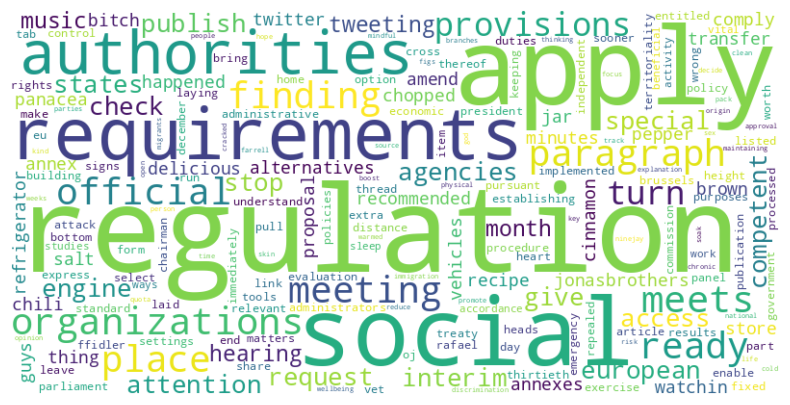

In [109]:
textoIA = ' '.join(listapalabrasIA)

# Crear un objeto WordCloud
nube_palabrasIA = WordCloud(width=800, height=400, background_color='white').generate(textoIA)

# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabrasIA, interpolation='bilinear')
plt.axis('off')
plt.show()


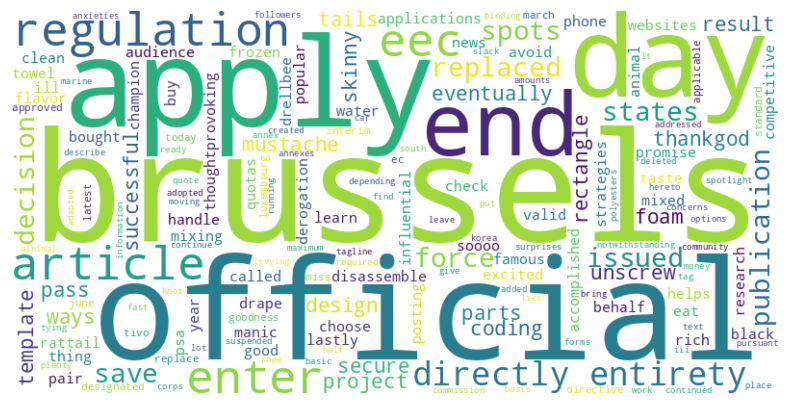

In [110]:
textoHumano = ' '.join(listaconpalabrashumano)

# Crear un objeto WordCloud
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(textoHumano)

# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pip install wordcloud matplotlib